In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
#Transaction = pd.read_excel('kpmg.xlsx', sheet_name = "Transactions")

In [26]:
CustomerDemo = pd.read_excel('kpmg.xlsx', sheet_name = "CustomerDemographic")
CustomerAddress = pd.read_excel('kpmg.xlsx', sheet_name = "CustomerAddress")

In [27]:
final = pd.merge(CustomerDemo, CustomerAddress, left_on = 'customer_id', right_on='customer_id', how='left')

In [28]:
final.drop(['customer_id','first_name','last_name',"Unnamed: 12",'deceased_indicator'], axis=1, inplace=True)

In [29]:
final.isnull().sum()

gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
address                                2
postcode                               2
state                                  2
country                                2
property_valuation                     2
dtype: int64

In [30]:
final.drop(['country'], axis=1, inplace= True)

In [31]:
final.dropna(inplace=True)

In [32]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2862 entries, 0 to 2863
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   gender                               2862 non-null   object        
 1   past_3_years_bike_related_purchases  2862 non-null   int64         
 2   DOB                                  2862 non-null   datetime64[ns]
 3   job_title                            2862 non-null   object        
 4   job_industry_category                2862 non-null   object        
 5   wealth_segment                       2862 non-null   object        
 6   owns_car                             2862 non-null   object        
 7   tenure                               2862 non-null   int64         
 8   address                              2862 non-null   object        
 9   postcode                             2862 non-null   float64       
 10  state       

In [33]:
from datetime import datetime

In [34]:
now = datetime.now()
def age(x):
    difference = now - x
    agenow = difference.days // 365
    return agenow

In [35]:
final['age'] = final['DOB'].apply(age)

In [36]:
def age_group(x):
    if x < 20:
        return "below_20"
    elif x >= 20 and x < 30:
        return "20-29"
    elif x >= 30 and x < 40 :
        return '30-39'
    elif x >= 40 and x < 50:
        return '40-49'
    elif x >= 50 and x < 60 :
        return '50-59'
    elif x >= 60 and x < 70:
        return '60-69'
    elif x >= 70:
        return 'above_70'

In [37]:
final['age_group'] = final['age'].apply(age_group)

In [38]:
final.drop(['DOB', 'age', 'address'], axis=1, inplace=True)

In [39]:
final.head(2)

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,age_group
0,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,2016.0,NSW,10.0,above_70
1,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16,2153.0,NSW,10.0,40-49


In [40]:
def wealth(x):
    if x == 'Mass Customer':
        return 1
    elif x == 'Affluent Customer':
        return 2
    elif x == 'High Net Worth':
        return 3
final['wealth_segment'] = final['wealth_segment'].apply(wealth)

In [41]:
final['rank'] = final[['property_valuation', 'wealth_segment', 'tenure',\
                       'past_3_years_bike_related_purchases']].apply(tuple, axis=1).rank(method='dense', ascending=False).astype(int)

<AxesSubplot:>

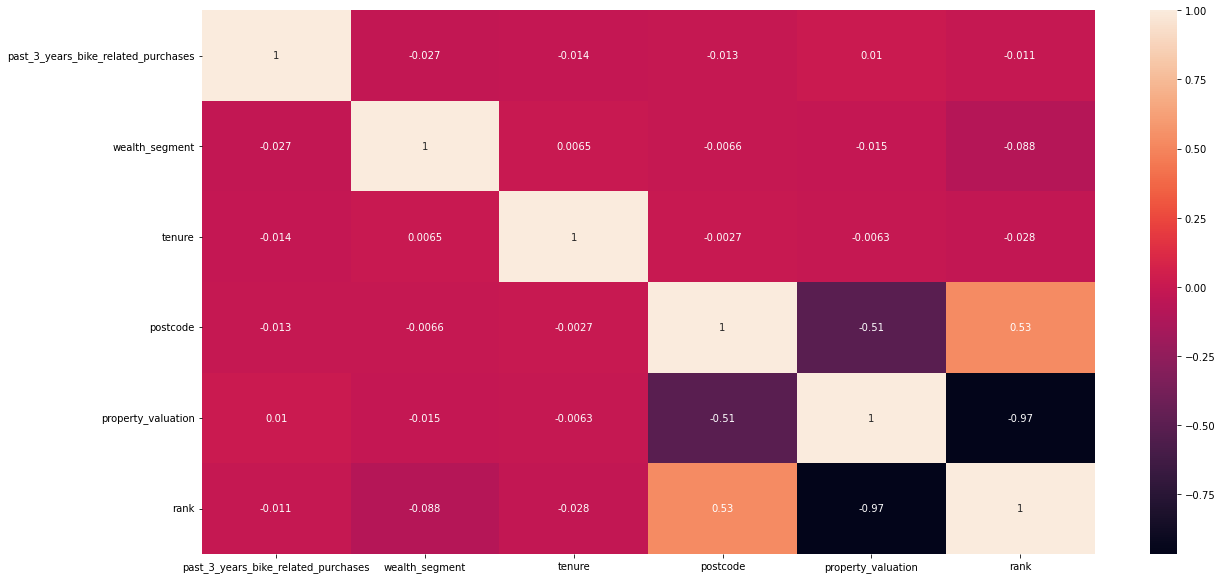

In [42]:
corr_matrix = final.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr_matrix, annot=True)

In [43]:
final =  pd.get_dummies(final, columns = ['gender','owns_car', 'age_group', 'state'])
final.head(2)

,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,tenure,postcode,property_valuation,rank,gender_Female,gender_Male,...,owns_car_Yes,age_group_20-29,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60-69,age_group_above_70,state_NSW,state_QLD,state_VIC
0,93,Executive Secretary,Health,1,11,2016.0,10.0,624,1,0,...,1,0,0,0,0,0,1,1,0,0
1,81,Administrative Officer,Financial Services,1,16,2153.0,10.0,581,0,1,...,1,0,0,1,0,0,0,1,0,0


In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

final['job_title'] = le.fit_transform(final['job_title'])
final['job_industry_category'] = le.fit_transform(final['job_industry_category'])
# x['address'] = le.fit_transform(x['address'])
# x['deceased_indicator'] = le.fit_transform(x['deceased_indicator'])
# x['age_group'] = le.fit_transform(x['age_group'])

In [45]:
final.sample(2)

,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,tenure,postcode,property_valuation,rank,gender_Female,gender_Male,...,owns_car_Yes,age_group_20-29,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60-69,age_group_above_70,state_NSW,state_QLD,state_VIC
2528,99,63,5,1,19,2171.0,9.0,948,0,1,...,1,0,1,0,0,0,0,1,0,0
1099,88,56,5,1,11,2261.0,8.0,1494,0,1,...,1,0,0,0,1,0,0,1,0,0


In [46]:
x = final.drop(['rank'], axis=1)
y = pd.DataFrame(final['rank'], columns= ['rank'])

In [47]:
x.columns

Index(['past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'tenure', 'postcode',
       'property_valuation', 'gender_Female', 'gender_Male', 'owns_car_No',
       'owns_car_Yes', 'age_group_20-29', 'age_group_30-39', 'age_group_40-49',
       'age_group_50-59', 'age_group_60-69', 'age_group_above_70', 'state_NSW',
       'state_QLD', 'state_VIC'],
      dtype='object')

## MODEL 

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn=ignore_warn

In [49]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=42)

In [50]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [51]:
# from sklearn.preprocessing import PolynomialFeatures
# pf = PolynomialFeatures(degree = 2, include_bias = False)
# X_train_poly = pf.fit_transform(x_train)
# X_test_poly = pf.fit_transform(x_test)

In [52]:
# l2 = Ridge(alpha = 0.1).fit(X_train_poly, y_train)

In [53]:
#l1 = Lasso(alpha = 0.001).fit(x_train, y_train)

In [54]:
lr = DecisionTreeRegressor()
lr.fit(x_train, y_train)

DecisionTreeRegressor()

In [55]:
predicted = lr.predict(x_test)

In [56]:
expected = y_test.iloc[:,0].values
predict = predicted.flatten()

In [57]:
mean_squared_error(expected, predict)

10.777648428405122

In [58]:
r2_score(expected, predict)

0.999983156565994

In [59]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict(x_test)
lr_probs = lr_probs[:]

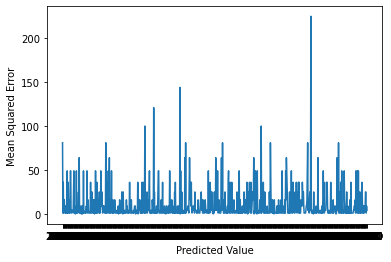

In [60]:
errors = list()
for i in range(len(expected)):
    
 # calculate error
     err = (expected[i] - predict[i])**2
 # store error
     errors.append(err)
 # report error
#      print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
plt.plot(errors)
plt.xticks(ticks=[i for i in range(len(errors))], labels=predict)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()

## USING NEW CUSTOMER DATASET

In [61]:
new_customers = pd.read_excel('kpmg.xlsx', sheet_name = "new_customer")

In [62]:
new_customers.columns

Index(['Name', 'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'tenure', 'postcode',
       'property_valuation', 'gender', 'DOB', 'deceased_indicator', 'owns_car',
       'state', 'address', 'country', 'Rank', 'Value'],
      dtype='object')

In [63]:
now = datetime.now()
def age(x):
    difference = now - x
    agenow = difference.days // 365
    return agenow

In [64]:
new_customers['age'] = new_customers['DOB'].apply(age)

In [65]:
def age_group(x):
    if x < 20:
        return "below_20"
    elif x >= 20 and x < 30:
        return "20-29"
    elif x >= 30 and x < 40 :
        return '30-39'
    elif x >= 40 and x < 50:
        return '40-49'
    elif x >= 50 and x < 60 :
        return '50-59'
    elif x >= 60 and x < 70:
        return '60-69'
    elif x >= 70:
        return 'above_70'

In [66]:
new_customers['age_group'] = new_customers['age'].apply(age_group)

In [67]:
for_model = new_customers.drop(['Name', 'DOB','address', 'country','Rank', 'Value', 'age', 'deceased_indicator'], axis =1)
for_model.dropna(inplace=True)

In [68]:
for_model =  pd.get_dummies(for_model, columns = ['gender', 'owns_car', 'age_group', 'state'])
for_model.head(2)

,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,tenure,postcode,property_valuation,gender_Female,gender_Male,owns_car_No,owns_car_Yes,age_group_20-29,age_group_30-39,age_group_40-49,age_group_50-59,age_group_60-69,age_group_above_70,state_NSW,state_QLD,state_VIC
0,66,VP Sales,Health,Mass Customer,4,4211,3,1,0,0,1,1,0,0,0,0,0,0,1,0
1,52,Junior Executive,Financial Services,Affluent Customer,8,2025,12,0,1,1,0,1,0,0,0,0,0,1,0,0


In [69]:
def wealth(x):
    if x == 'Mass Customer':
        return 1
    elif x == 'Affluent Customer':
        return 2
    elif x == 'High Net Worth':
        return 3
    
for_model['wealth_segment'] = for_model['wealth_segment'].apply(wealth)

In [70]:
le=LabelEncoder()

for_model['job_title'] = le.fit_transform(for_model['job_title'])
for_model['job_industry_category'] = le.fit_transform(for_model['job_industry_category'])
for_model.columns

Index(['past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'tenure', 'postcode',
       'property_valuation', 'gender_Female', 'gender_Male', 'owns_car_No',
       'owns_car_Yes', 'age_group_20-29', 'age_group_30-39', 'age_group_40-49',
       'age_group_50-59', 'age_group_60-69', 'age_group_above_70', 'state_NSW',
       'state_QLD', 'state_VIC'],
      dtype='object')

In [71]:
for_model=sc.transform(for_model)

In [72]:
new_customers_pred = lr.predict(for_model)

In [73]:
pred_df = pd.DataFrame(new_customers_pred, columns = ['Pred_Rank'])

In [74]:
new_data = new_customers.join(pred_df)

In [75]:
new_data.head(2)

,Name,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,tenure,postcode,property_valuation,gender,DOB,deceased_indicator,owns_car,state,address,country,Rank,Value,age,age_group,Pred_Rank
0,Lura Fawdrie,66,VP Sales,Health,Mass Customer,4,4211,3,Female,2002-01-17,N,Yes,QLD,67183 Anniversary Parkway,Australia,396,0.9375,22,20-29,2547.0
1,Simmonds Bapty,52,Junior Executive,Financial Services,Affluent Customer,8,2025,12,Male,2002-01-04,N,No,NSW,47 Susan Park,Australia,760,0.6375,22,20-29,57.0


In [81]:
new_data['new_rank'] = new_data['Pred_Rank'].rank()

In [79]:
new_data.sample(5)

,Name,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,tenure,postcode,property_valuation,gender,DOB,...,owns_car,state,address,country,Rank,Value,age,age_group,Pred_Rank,new_rank
200,Meade Bampton,69,Health Coach III,Health,High Net Worth,17,2090,7,Male,1982-04-25,...,No,NSW,7870 Stuart Crossing,Australia,755,0.640000,41,40-49,1629.0,416.0
307,Rosene Beckey,25,Account Executive,Health,Mass Customer,14,2107,11,Female,1974-05-21,...,Yes,NSW,02463 Portage Center,Australia,801,0.597656,49,40-49,272.0,72.0
649,Darryl Hovee,2,Professor,Financial Services,Mass Customer,19,2047,12,Female,1944-04-28,...,Yes,NSW,381 Emmet Terrace,Australia,655,0.717187,79,above_70,75.0,19.5
15,Kippy Barabisch,11,Legal Assistant,Manufacturing,Mass Customer,4,2125,11,Male,2000-04-07,...,No,NSW,840 Graceland Street,Australia,215,1.128906,23,20-29,315.0,81.0
444,Abigale Sives,48,VP Marketing,Health,Affluent Customer,14,4207,4,Female,1963-12-13,...,Yes,QLD,2 Glendale Center,Australia,230,1.109375,60,60-69,2330.0,614.5


In [82]:
new_data.to_csv('predicted_data.csv', index=False)